#Warm-up Tutorial


## Introduction
This notebook will start with a tutorial to work through statistical simulations and plotting methods.  In section "Lab 2 Instructions", you will find the more detailed instructions for your lab.  

Note this you are NOT turning in this notebook but rather you can extract plots and results for you Lab Report which will be a PDF document uploaded to Gradescope.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

## Coin flip example

We have to flip 5 coins to get heads or tails. We want to report back the total number of heads and the total number of tails. We want to know whether our experiment matches our prediction.

How do we do this? Define **`heads = 1`** and **`tails = 0`**. Now we can talk to the computer. Now what?

*Google:* `random uniform 0 1 integers python`

Google tells me to use **`np.random.randint`**. Let us try that:

In [3]:
draw = np.random.randint(2, size=5) # Google suggested this
heads_count = len(draw[np.where(draw == 1)])
tails_count = len(draw[(np.where(draw == 0))])
print(heads_count, tails_count) # Does the answer make sense?

4 1


So we have flipped a set of 5 coins once and we count heads and tails. Can we infer the probability of getting 0 heads from flipping 5 coins? How about 5 heads? How about 1,2,3 or 4 heads? What do we need to do?

Add a for loop and flip the set of 5 coins 10 times:

In [4]:
for i in range(0,10):
    draw = np.random.randint(2, size=5)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    print(heads_count, tails_count)

2 3
1 4
2 3
2 3
3 2
5 0
3 2
2 3
2 3
3 2


Now, how many 0s? 1s? 2s? 3s? 4s? 5s? Make this easier.....

In [5]:
counts = np.zeros(6)
print(counts)
for i in range(0,10):
    draw = np.random.randint(2, size=5)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    counts[heads_count] = counts[heads_count] + 1
    print(counts)

[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 1. 0. 1. 0.]
[1. 0. 1. 0. 1. 0.]
[1. 0. 1. 0. 2. 0.]
[1. 0. 2. 0. 2. 0.]
[1. 0. 2. 1. 2. 0.]
[1. 0. 2. 1. 3. 0.]
[1. 0. 2. 2. 3. 0.]
[1. 0. 2. 3. 3. 0.]
[1. 0. 3. 3. 3. 0.]


We need **a lot** more flips of the set of 5 coins. Try 100.

[0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0.]
[1. 0. 1. 0. 0. 0.]
[1. 0. 1. 0. 1. 0.]
[1. 1. 1. 0. 1. 0.]
[1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 2. 0.]
[1. 1. 2. 1. 2. 0.]
[1. 1. 2. 1. 3. 0.]
[1. 1. 2. 2. 3. 0.]
[1. 1. 3. 2. 3. 0.]
[1. 1. 3. 2. 4. 0.]
[1. 1. 4. 2. 4. 0.]
[1. 1. 4. 3. 4. 0.]
[1. 1. 4. 4. 4. 0.]
[1. 1. 5. 4. 4. 0.]
[1. 1. 5. 5. 4. 0.]
[1. 2. 5. 5. 4. 0.]
[1. 3. 5. 5. 4. 0.]
[1. 3. 5. 5. 5. 0.]
[1. 3. 5. 6. 5. 0.]
[1. 4. 5. 6. 5. 0.]
[1. 4. 6. 6. 5. 0.]
[1. 4. 6. 7. 5. 0.]
[1. 4. 6. 8. 5. 0.]
[1. 4. 7. 8. 5. 0.]
[1. 4. 8. 8. 5. 0.]
[1. 4. 9. 8. 5. 0.]
[1. 5. 9. 8. 5. 0.]
[1. 5. 9. 8. 6. 0.]
[ 1.  5. 10.  8.  6.  0.]
[ 1.  5. 11.  8.  6.  0.]
[ 1.  5. 11.  9.  6.  0.]
[ 1.  6. 11.  9.  6.  0.]
[ 1.  6. 11. 10.  6.  0.]
[ 1.  6. 12. 10.  6.  0.]
[ 1.  6. 12. 10.  7.  0.]
[ 1.  6. 12. 11.  7.  0.]
[ 1.  6. 12. 12.  7.  0.]
[ 1.  7. 12. 12.  7.  0.]
[ 1.  7. 12. 12.  8.  0.]
[ 1.  7. 12. 13.  8.  0.]
[ 1.  8. 12. 13.  8.  0.]
[ 1.  8. 13. 13.  8.  0.]
[ 1.  8. 14. 13.  8.  0.]
[ 1.  8. 1

<BarContainer object of 6 artists>

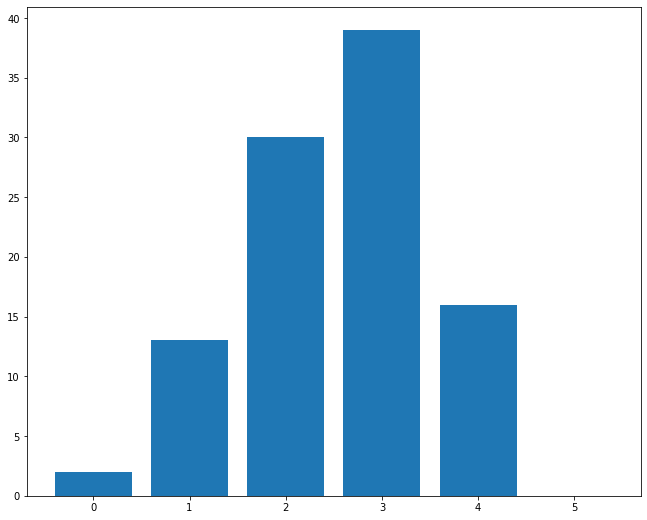

In [6]:
counts = np.zeros(6)
print(counts)
for i in range(0,100):
        draw = np.random.randint(2, size=5)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
        print (counts)
plt.bar(np.arange(6), counts)

## The Binomial Theorem 

Now, over plot a theory curve, which is a representation of the binomial series for p=0.5 (general binomial distribution is slightly different!):
$P(x=n) = \frac{N!}{n!(N-n)!}p^N$

What is $n$? $N$? 

$N$ is the total number of coins being flipped.
$n$ is the number of heads you observe.

In [7]:
from scipy.special import factorial
def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx
print(PNx(5))

[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]


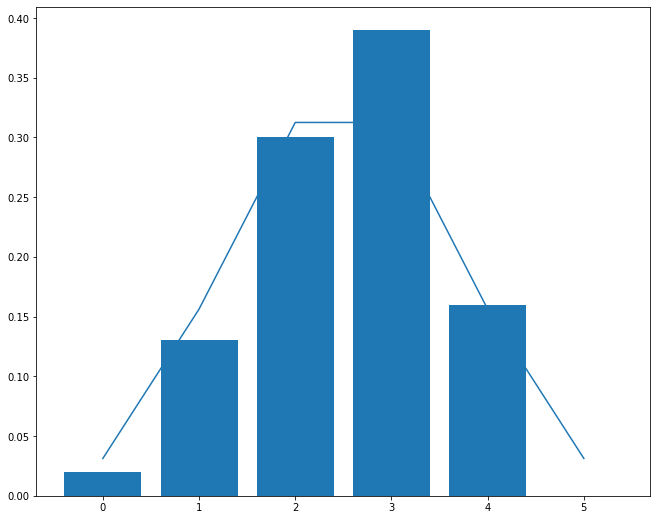

In [8]:
plt.bar(np.arange(6), counts/100.0)
plt.plot(np.arange(6), PNx(5))

What did we learn? 

1. How to make an "experiment" in an iPython Notebook (i.e., on a computer).  <font color="crimson">This exercise was a computer simulation!</font>

2. Analytic statistical theory makes sense in the limit of large $N$.  <font color ="crimson"> What do we do when N is small?</font>

How about we have a little fun and make a movie, this time flipping 10 coins. Our story is to watch as the observed binomial theory converges on the theoretical binomial theorem. How many frames do we need (where each frame includes an additional role of the 10 coins) before life imitates "theory"?

*Note: The following cell may take around a minute to compute*

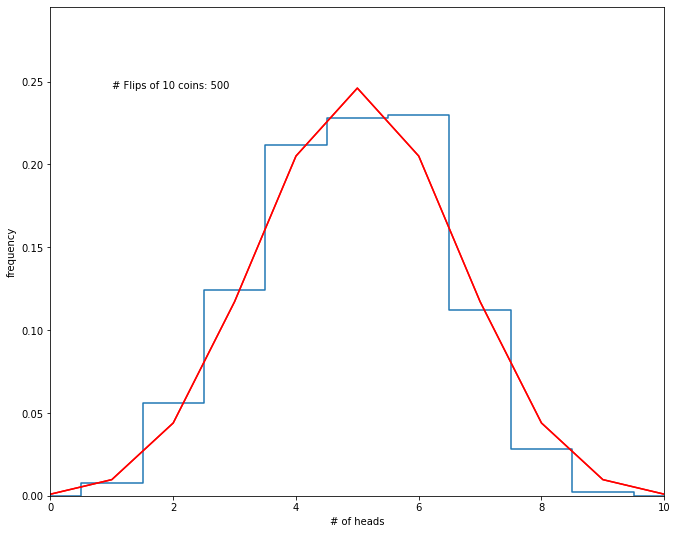

In [9]:
N_coins = 10

# First set up the figure, the axis, and the plot element we want to animate
PN_mid = max(PNx(N_coins))
fig = plt.figure()
ax = plt.axes(xlim=(0, N_coins), ylim=(0, PN_mid*1.2))
line, = ax.plot(np.arange(N_coins+1), np.zeros(N_coins+1), drawstyle="steps-mid")

# initialization function: plot the background of each frame
def init():
    plt.plot(np.arange(N_coins+1), PNx(N_coins), color="red")
    line.set_data(np.arange(N_coins+1), np.zeros(N_coins+1))
    plt.xlabel("# of heads")
    plt.ylabel("frequency")
    return line,

# animation function.  This is called sequentially
def count_fun(i):
    flips_per_frame = 5
    counts = np.zeros(N_coins+1)
    j = (i+1)*flips_per_frame
    for k in range(j):
        draw = np.random.randint(2, size=N_coins)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
    x = np.linspace(0, N_coins, N_coins+1)
    y = counts/j
    line.set_data(x, y)
    ax.annotate("# Flips of {} coins: {}".format(N_coins, j),
                xy=(2, PN_mid), xytext=(1, PN_mid), backgroundcolor='w')
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, count_fun, init_func=init,
                               frames=100, interval=200, blit=True)

anim

# Lab 2 Instructions

Astro 361 Lab #2	Lab Detailed Instructions for “Statistics for Astronomical Applications”	


## Introduction



We often think of astronomical data typically following either the Poissonian or the Gaussian probability distribution function (PDF). In this Astro 361 Statistics lab, you will exercise your programming skills by writing a simple function to numerically calculate the binomial probability from “coin flip” experiments where the probability of 2 discrete outcomes are equal. You will compare your computer simulation of a large number of trials to the exact analytical solution using the binomial PDF. You will then consider a binomial PDF where the probability of success is very small and a large number of trials are used: this should closely resemble the Poisson PDF. Your lab write up should include a description of these PDFs and where they play a role in Astronomy. 

The steps given below are designed to help you conduct the laboratory. You shou
ld also refer to the material from lecture for help when needed or ask the instru tors. 

It will be good to use functions sometimes in this work but you do not need to use them everywhere (recall you can use "def function(arguments):" to set off a function in a jupyter notebook cell. .  When does it make sense to use a function and when does it not?

Specific Goals of the lab to be included in your notebook and discussed in your write-up:


## Exercise 1 -- Simulating the Binomial Distribution
 Write python code which takes as input the number of trials N (i.e., coins that are being flipped) and the number of successes x (out of N), and reports the observed probability: P(N,x) for a coin flip (assuming p(heads or tails) = 0.5).  Explain your methods in your report (your code itself will not be in report but saved in your folder for reference).  Compare your simulation with the expections from the analytic formula:
$P(N,x)=\frac{N!}{x!(N-x)!} p^x (1-p)^{N-x}	$		

DO NOT USE the binomial formula to generate your data. Instead, use the frequentist technique of averaging over a large set of M realizations from a random variable. Essentially you need to do the coin-fliping experiment many times inside the computer and show the average results. The examples in the "Starting Notebook" should help you get started. 

Some tips to organize your programming (you do not include answers for each guiding question below in your report, but these are meant to help you think through the exercise).



In [10]:
# Definitions

counts = np.zeros(20)
N = 1000 # number of runs
x = 0 # number of successes out of N
n = 20 # number of coins each run

Text(0, 0.5, '# of occurances out of n trials')

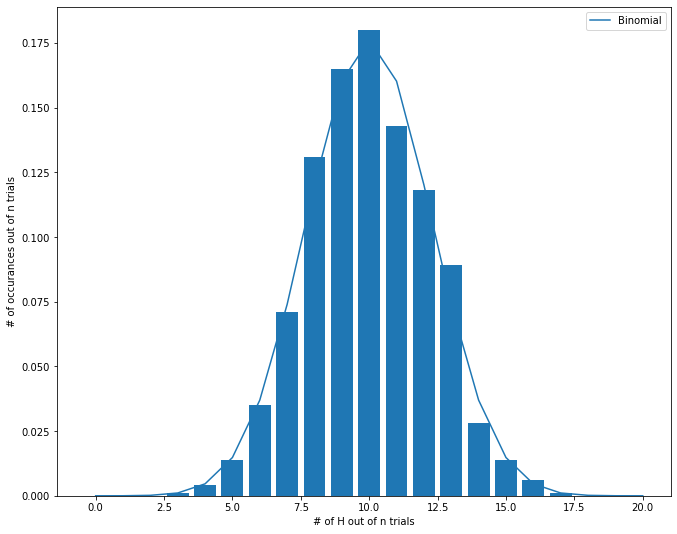

In [11]:
# Draw between 0 and 1. If draw is 1, add a "success" count to the array
# Produces and then graphs the amount of times a certain # of H out of N 
# occurred (prob). 

for i in range(0,N):
        draw = np.random.randint(2, size=n)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
        prob = counts / N 
plt.bar(np.arange(20), prob )

# Overplotting the analytic prediction of P(20,x) using the binomial probability formula.

def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx
plt.plot(PNx(20), label="Binomial")

# Graph details

plt.legend(loc="upper right")
plt.xlabel("# of H out of n trials")
plt.ylabel("# of occurances out of n trials")

a. Define your variables. What are the inputs? What are you going to return? What intermediate variables do you need that you will not return?


b. How will you fill these variables? What functions/procedures do you need? How will you average over a large set of M realizations? How large does M need to be ? 

c. Use your code to make a histogram of P(20,x), where x goes from 0 to 20.  Where is the peak of your distribution? Is this what you expected?  You can use plt.savefig('filename.png') to save image to disk or you take screenshots to put in your labwriteup.

d. Overplot the analytic prediction of P(20,x) using the binomial probability formula.  You should include a derivation of the binomial probability distribution in the theory section of your write-up.  Check the formula you use for the binomial distribution with the one presented in class.  Write down how you numerically calculated the analytical prediction.

##Exercise 2 - Binomial to Gaussian PDF. 


a. In the limit of small p, we can derive the Poisson probability distribution function from the binomial PDF.  Please show in the Theory section of your report that the binomial formula

$P(N,x)=\frac{N!}{x!(N-x)!} p^x (1-p)^{N-x}	$		

can be simplified simplified, in limit of $p<<1$,

$P(N,x) = \frac{\lambda^x}{x!}  {e^{-\lambda}}$, where $\lambda = Np$






Here are some ideas on how to do this math for your Theory Section:

(1) Rewrite parts of P(N,n) after taking the natural logarithm. 
(2) Apply rules associated with natural logs  (ln(xy) =yln(x) , ln(1-x)  -x for $x<<1$),
(3) Utilize Stirling’s Approximation for ln(N!) (Wikipedia is ok).  Stirling's approximation should get rid of *most* of the factorials.  Use the simple version free of the symbol π and any exponentials.  Keep in mind that the answer (which you have) has n! and p^n in it so don't over simplify!
(4) Take care to justify the approximations you use (some approximations work because things are small and others because things are big).
(5) Some of the terms can be neglected because they are small relative to others. 
(6) At the end, invert back from the natural log by taking exponential of your result. Collect terms in the form requested.


b. Re-write your code for the experimental binomial probability to allow for a variable probability of success. Now plot the histogram of P(100,x) for small p.

In [12]:
import random
import decimal
import math

# Definitions

N = 1000
x = 0
n = 100
p = 0.01
b = n+1

Text(0, 0.5, '# of occurances out of n trials')

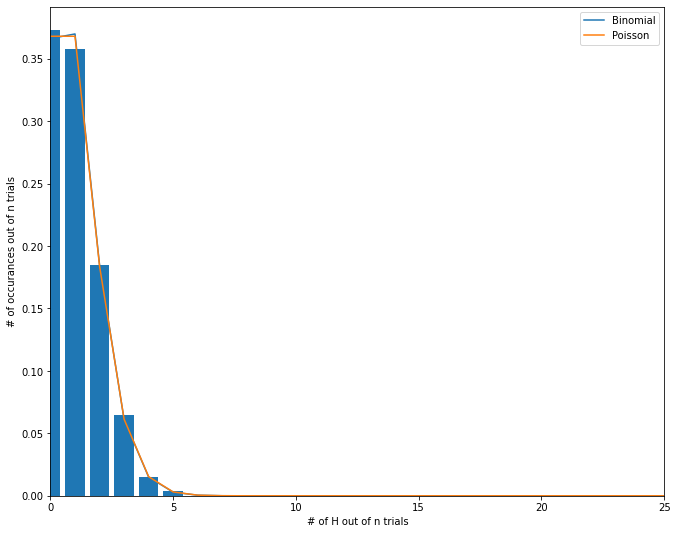

In [13]:
# Binom PDF for adjustable p. Picks a random decimal between 0 and 1. If 
# the decimal is less than p, it counts as a success and is added to 
# the array just as the last PDF loop.

counts = np.zeros(n+1)
for i in range(0,N):
  draw = np.random.uniform(low=0,high=1.,size=n)
  heads_count = len(draw[(np.where(draw < p))])
  counts[heads_count] = counts[heads_count] + 1
prob = counts / N 
plt.bar(np.arange(b), prob)

# Overplotting the analytic prediction of P(n,x) using the binomial probability formula.

def PNx(N):
    p = 0.01
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((p)**x)*((1-p)**(N-x))
    return PNx
plt.plot(PNx(n), label="Binomial")

# Overplotting the analytic prediction of P(n,x) using the Poisson probability formula.

def Poisson(N):
    p = 0.01
    x = (np.arange(N+1))
    poi = (((N*p)**x)/factorial(x))*math.exp(-N*p)
    return poi
plt.plot(Poisson(n),label="Poisson")

# Graph details

plt.xlim(0,25)
plt.legend(loc="upper right")
plt.xlabel("# of H out of n trials")
plt.ylabel("# of occurances out of n trials")

c. Compare your empirical histogram to the exact prediction using the analytic binomial probability distribution. Also compare your histogram to the prediction of the analytic Poisson distribution for small p. Write down how you numerically determined these.

##Exercise 3 - Poisson Noise


With your simulation from last part for small p, Lets explore Poisson Noise.  For a given and x, we get a range of results which describe the PDF (probability distribution function). The PDFs can be described by their mean and Variance.   Recall: Var(x) $= < (x-<x>)^2> = <x^2> - <x>^2 $

a. For a range of N, calculate the mean <x> counts detected and the Var(x).


In [14]:
# Definitions

N = 10000
x = 0
n = 10
p = 0.01

# Calculating for a range of coins

mean = [] # Resetting arrays
var = []
while n <= 1000: # Changes the number of coins being flipped
  newArr = [] # Resetting arrays
  counts = np.zeros(n+1)
  for i in range(0,N): # Repeats trials 
    draw = np.random.uniform(low=0,high=1.,size=n) # loops through individual coins (flips each)
    heads_count = len(draw[(np.where(draw < p))])
    counts[heads_count] = counts[heads_count] + 1
    newArr.append(heads_count)
  n = n + 10
  mean.append(np.mean(newArr))
  var.append(np.var(newArr))

b. Now, plot the Variance (y axis) vs mean (x axis) and fit a line to the curve.  Does this result depend on value of p?

Best fit line is y = 0.9877128591078872 x + 0.001402562585628451


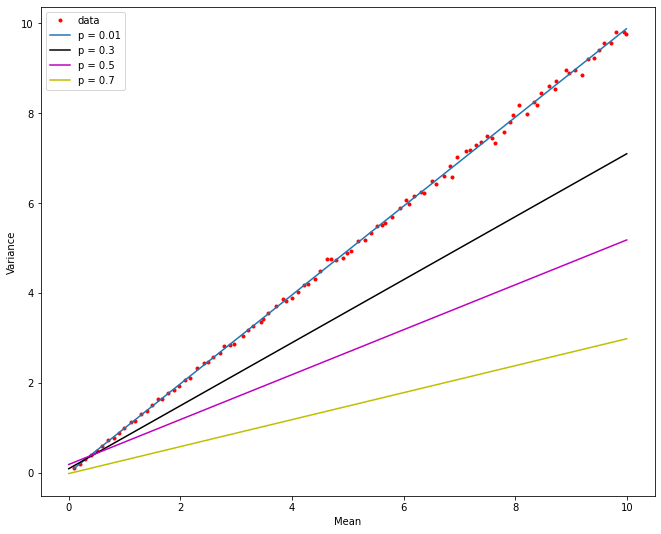

In [15]:
# Plotting the variance vs the mean and fitting it to a curve 

coeff=np.polyfit(mean, var,1)
poly = np.poly1d(coeff)
new_x = np.linspace(min(mean),max(mean))
new_y = poly(new_x)
plt.plot(mean, var, 'r.', label = "data")
plt.plot( new_x, new_y, label = "p = 0.01")

plt.xlabel('Mean')
plt.ylabel('Variance')

m, b = np.polyfit(mean, var, 1.0)
print("Best fit line is y =", m, 'x +', b )

# Yes, the result depends heavily on the value of p. 

# p = 0.01 : Best fit line is y = 0.9902150636579332 x + -0.0038365895664251803
# p = 0.3 : Best fit line is y = 0.7003695030456485 x + 0.0889366079874238
# p = 0.5 : Best fit line is y = 0.49940280987118174 x + 0.1824736885305884
# p = 0.7 : Best fit line is y = 0.29981233380944877 x + -0.019106485711806995

mean2 = np.linspace(0, 10)
plt.plot(mean2, 0.7003695030456485*mean2 + 0.0889366079874238, 'k', label = "p = 0.3")
plt.plot(mean2, 0.49940280987118174*mean2 + 0.1824736885305884, 'm', label = "p = 0.5")
plt.plot(mean2, 0.29981233380944877*mean2 + -0.019106485711806995, 'y', label = "p = 0.7")
plt.legend(loc="upper left")

c. What is your empirical results for the Variance vs x (based on your formula fit)?


d. How does your derived formula result compare to what we expect based on Poisson Noise?